# Kalorimetrie Laborversuch

Author: Moritz Roth

Datum: 10.12.2023

Gruppe: 12

## Forschungsfrage

Wie unterschiedlich sind die spezifischen Wärmekapazitäten der drei Proben? Welche Materialklasse (Kunstoff oder Metall) besitzt die größere Wärmekapazität?Wie weit weichen die "offiziellen" wärmekapazitäten von den experimentell bestimmten ab?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

Material: Matgnetrührer, 5 Temperatursensoren,Becherglas,Staberhitzer,Topf,Becherglas,Heitzspule mit Spannungs-/Strommessgerät,Messing Probe, Alu Probe, PA_66 Probe

Begonnen hat der Versuch damit,die Kalorimetriekonstante zu bestimmen. Dafür haben wir in einem Bessbecher mit kaltem Wasser eine Heizspule eingesetzt und angeschalten, wobei wir die Spannung und den Strom über eine bestimmte Zerit reguliert haben.
Der zweite und Umfangreichere Teil des Laborversuchs bestand daraus drei Materialproben auszusuchen und diese in einem Topf voll Wasser auf 80 Grad zu erhitzen. Währenddessen wurde in das Becherglas kaltes Leitungswasser gegeben und die sensoren wieder hinzugefügt. Nachdem eine Probe ihre Solltemperatur erreicht hat wird sie aus dem Heißen Wasserbad genommen und in das kalte Becherglas gestellt. Wahrend dieses vorgangs ist die Messung schon gesartet und zeichnet von den Verschiedenen Sensoren im Becherglas, der Umgebung und im Wasserbad die Temperaturen auf, welche alle in einer Hdf5 Datei gespeichert werden. Dieser Durchgang wird für alle anderen Proben wiederholt bis alle Gewünschten Messdaten für die Berechnung der spezifischen Wärmekapazität gespeichert sind.

<img src="figures/versuchsaufbaukalorimeterkonst.jpg" width="800">
<img src="figures/versuchaufbauspezwärmekap2.jpg" width="800">
<img src="figures/versuchsaufbausepezwärmekap.jpg" width="800">

## Versuchsauswertung

In [149]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [150]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "/home/pi/calorimetry_laboratory/data/kalorimeterkonstante/kalorimeterkonstante.h5"

# DONE #

In [151]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,'RawData')
#print (data_dict)
# DONE #

In [152]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [153]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_environment][0]

data_mean = [mean_std_calorimeter,mean_std_environment]
data_time = [time_calorimeter,time_environment] 

print(mean_std_calorimeter)
print(mean_std_environment)
# DONE #

[[ 0.05103104  0.0779512   0.0779512   0.0779512   0.0779512   0.05103104
   0.10622957  0.10206207  0.10622957  0.10622957  0.10622957  0.0779512
   0.0779512   0.0779512   0.10206207  0.13501543  0.0779512   0.10206207
   0.12842529  0.10206207  0.10206207  0.10206207  0.10206207  0.10206207
   0.10206207  0.10206207  0.0779512   0.10622957  0.0779512   0.10206207
   0.0779512   0.0779512   0.0779512   0.10206207  0.10622957  0.10622957
   0.10206207  0.05103104  0.0779512   0.05103104  0.05103104  0.0779512
   0.05892557  0.0779512   0.05103104  0.0779512   0.0779512   0.10622957
   0.0779512   0.10622957  0.0779512   0.0779512   0.05103104  0.10622957
   0.0779512   0.05103104  0.05103104  0.05103104  0.0779512 ]
 [22.0625     22.16666667 22.20833333 22.20833333 22.22916667 22.25
  22.27083333 22.25       22.27083333 22.27083333 22.33333333 22.41666667
  22.52083333 22.58333333 22.6875     22.75       22.91666667 23.
  23.10416667 23.1875     23.3125     23.375      23.5        23.

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

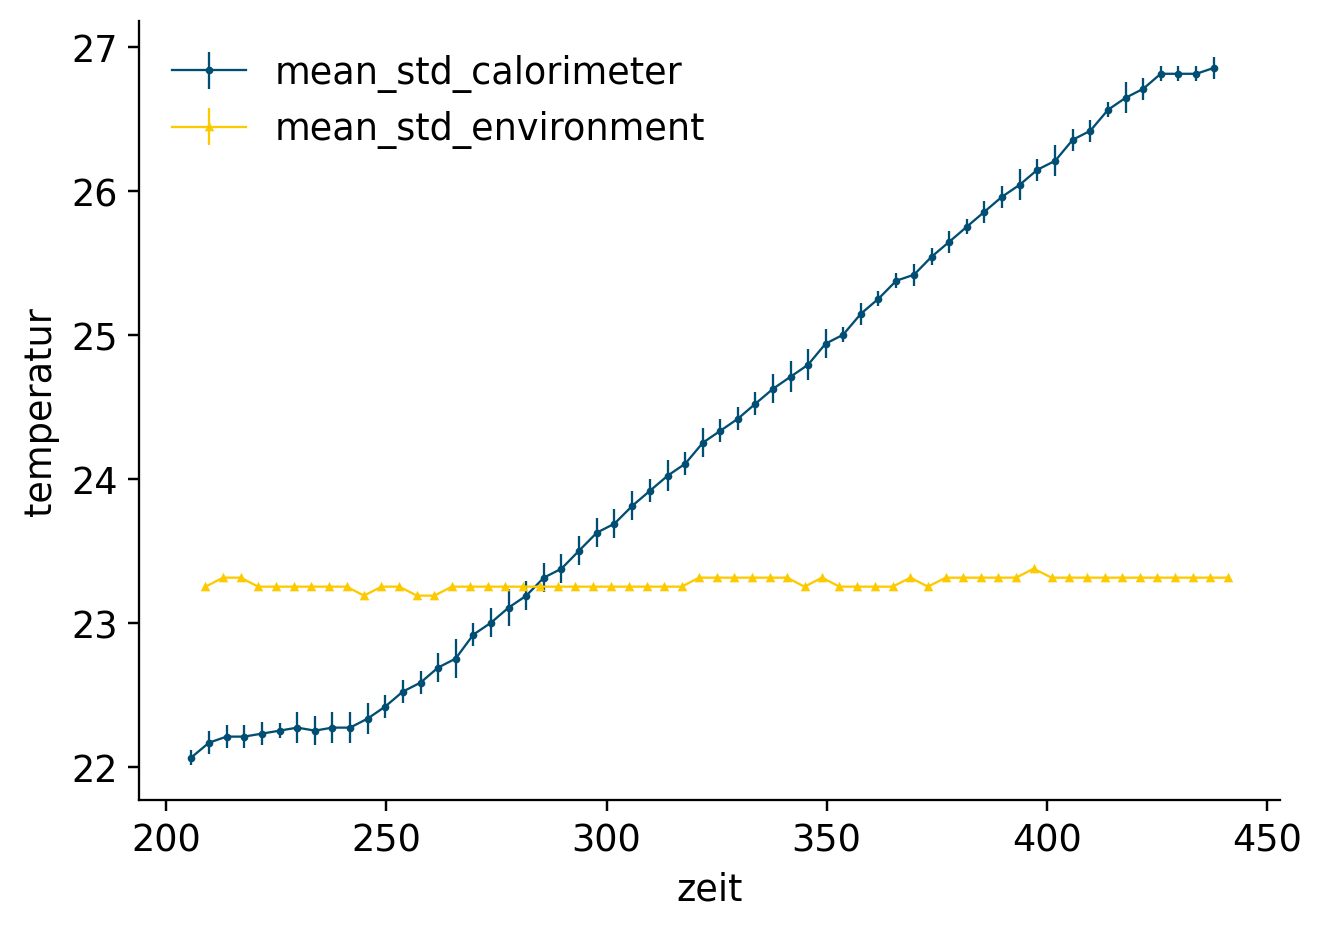

In [154]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time(data_mean,data_time,['mean_std_calorimeter','mean_std_environment'],'zeit','temperatur')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [155]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
#wassermaße die sich im gefäß befindet
path_h20 = '/home/pi/calorimetry_laboratory/datasheets'
water_mass = (m_json.get_json_entry(path_h20,"1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753",["calorimeter","medium","mass","value"]))
#400
print(water_mass)
# DONE #

400


In [156]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
import h5py 

path_hdf5 = "/home/pi/calorimetry_laboratory/data/kalorimeterkonstante/kalorimeterkonstante.h5"

with h5py.File(path_hdf5,'r') as hdf5_file:
    
    f = hdf5_file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd'] #uuid von erhitzer auf den die drei größen einwirken
    
    current = f["current_A"][()]
    heat_time = f["heat_time_s"][()]
    voltage = f["voltage_V"][()]
    print(current)
    print(heat_time)
    print(voltage)    
# DONE #

4.0
180.0
12.4


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [157]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature']) 
print(temperature_end,temperature_start)
# DONE #

26.816964285714285 22.12890625


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [158]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (current*heat_time*voltage)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [159]:
calorimeter_const

1904.4132841328417

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [160]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "/home/pi/calorimetry_laboratory/data/spez_wk_alu/spez_wk_alu.h5"

# DONE #

In [161]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,'RawData')

# DONE #

In [162]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [163]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_env][0]
time_heater = data_dict['timestamp'][index_bath][0]

data_mean = [mean_std_calorimeter,mean_std_environment,mean_std_heater]
data_time = [time_calorimeter,time_environment,time_heater]

# DONE #

#### (iii) Daten ploten

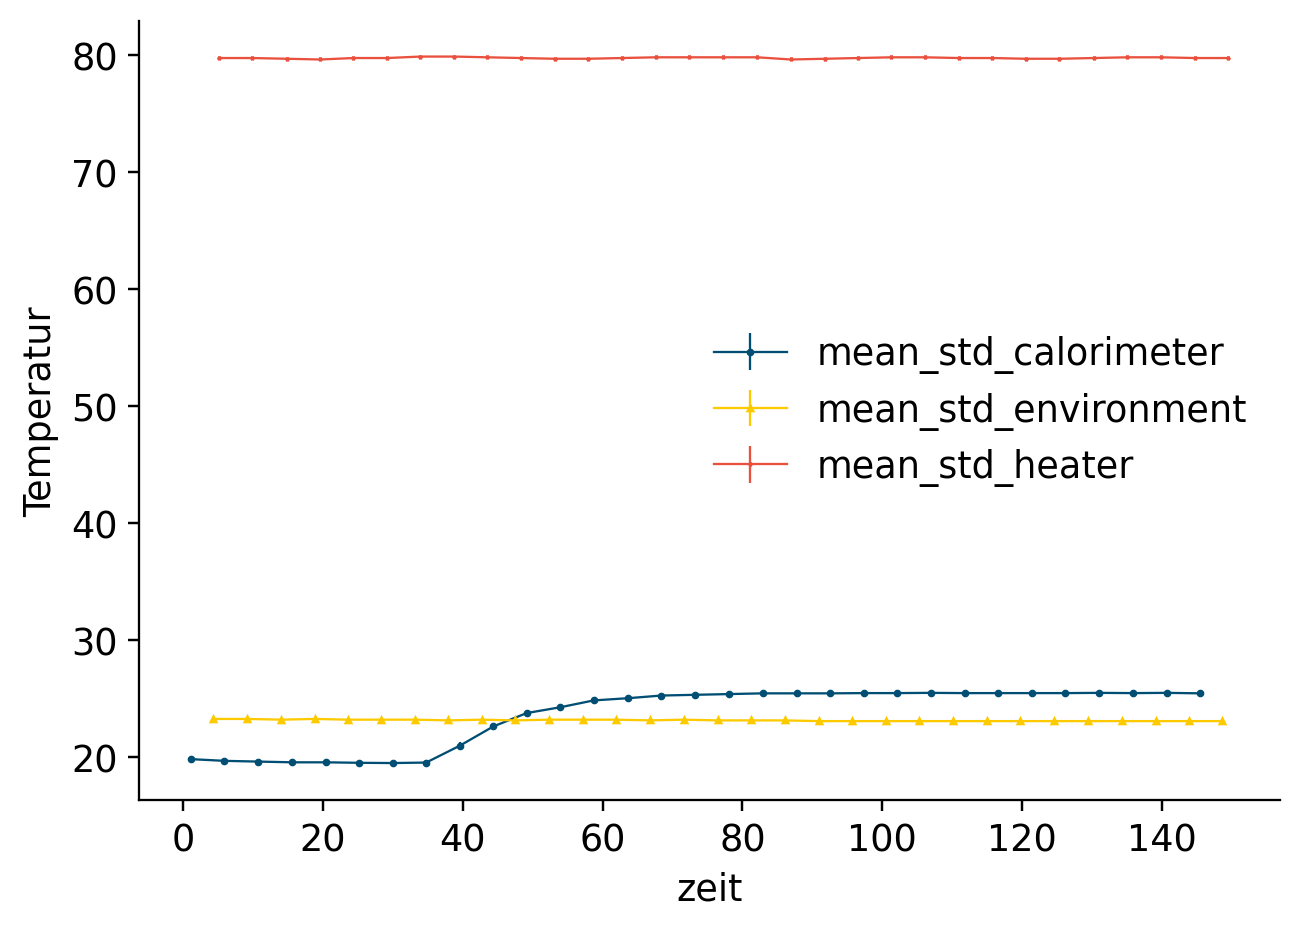

In [164]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data_mean,data_time,['mean_std_calorimeter','mean_std_environment','mean_std_heater'],'zeit','Temperatur')

# DONE #

#### (iv) Metadaten auslesen

In [165]:
# TODO: Read mass of the sample from the metadata of the experiment.
path_p1 = '/home/pi/calorimetry_laboratory/datasheets'

sample_mass = (m_json.get_json_entry(path_p1,"1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b",["probe","mass","value"]))

print(sample_mass)
# DONE #

226


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [166]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 

print(temperature_mix, temperature_start_water)

# DONE #

25.400390625 19.375


In [167]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
print(temperature_start_sample)


# DONE #

79.7625


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [168]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [169]:
sample_heat_capa

0.9339888044277191

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [170]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "/home/pi/calorimetry_laboratory/data/spez_wk_messing/spez_wk_messing.h5"

# DONE #

In [171]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,'RawData')

# DONE #

In [172]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [173]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_env][0]
time_heater = data_dict['timestamp'][index_bath][0]

data_mean = [mean_std_calorimeter,mean_std_environment,mean_std_heater]
data_time = [time_calorimeter,time_environment,time_heater]

# DONE #

#### (iii) Daten ploten

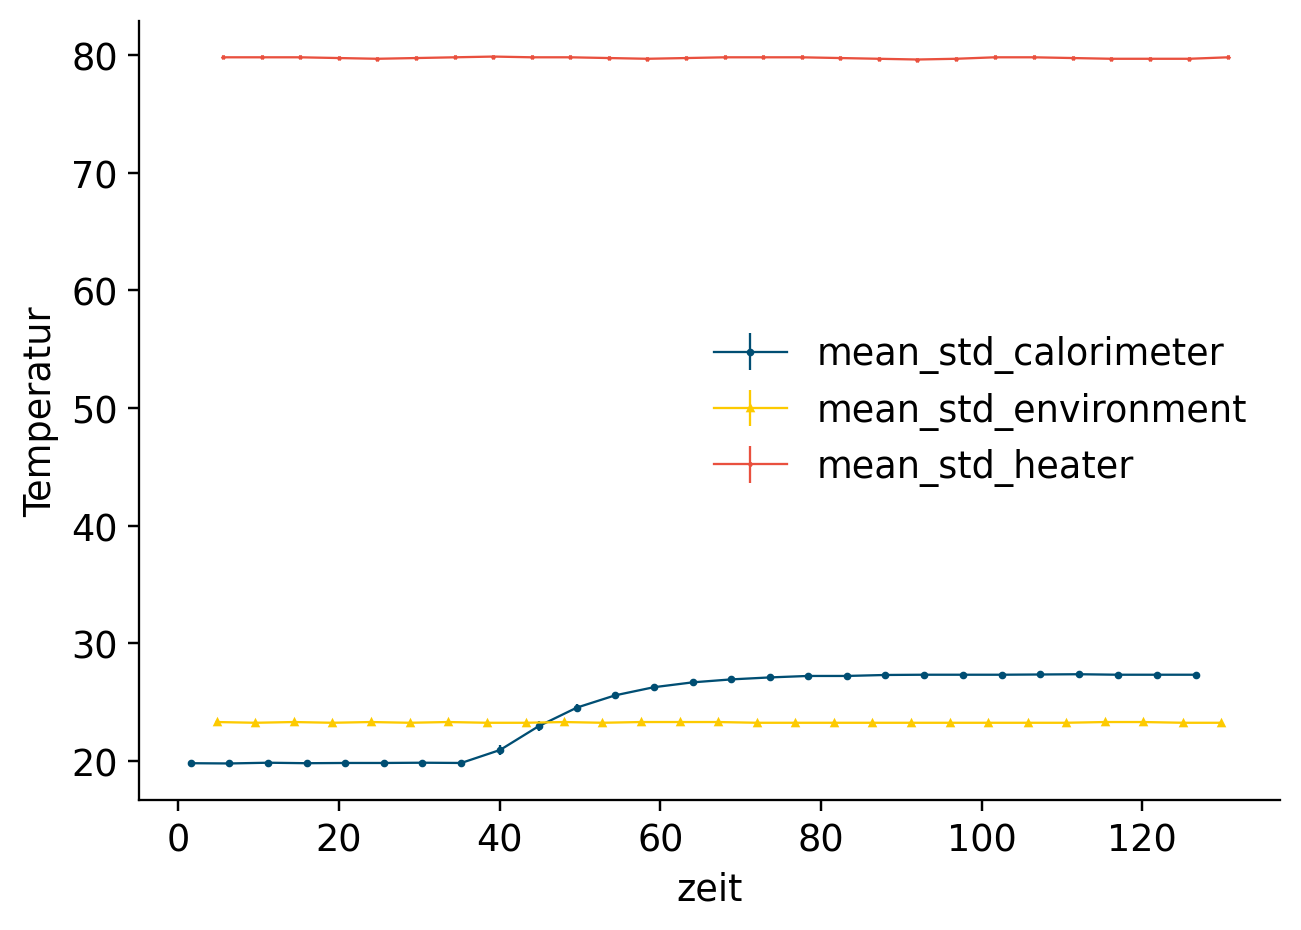

In [174]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data_mean,data_time,['mean_std_calorimeter','mean_std_environment','mean_std_heater'],'zeit','Temperatur')

# DONE #

#### (iv) Metadaten auslesen

In [175]:
# TODO: Read mass of the sample from the metadata of the experiment.


path_p2 = '/home/pi/calorimetry_laboratory/datasheets'

sample_mass = (m_json.get_json_entry(path_p2,"1ee57b38-1b08-63da-8b38-63a271236a0b",["probe","mass","value"]))

print(sample_mass)
# DONE #


680


#### (v) Anfangs- und Endwert der Temperatur

In [176]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 

print(temperature_mix, temperature_start_water)
# DONE #

27.260416666666668 19.7578125


In [177]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
print(temperature_start_sample)

# DONE #

79.79375


#### (vi) spezifische Wärmekapazität bestimmen

In [178]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))
# DONE #

#### (Vii) Ergebnis

In [179]:
sample_heat_capa

0.39997179308908665

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [180]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "/home/pi/calorimetry_laboratory/data/spez_wk_pa66/spez_wk_pa66.h5"

# DONE #

In [181]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,'RawData')

# DONE #

In [182]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [183]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_env][0]
time_heater = data_dict['timestamp'][index_bath][0]

data_mean = [mean_std_calorimeter,mean_std_environment,mean_std_heater]
data_time = [time_calorimeter,time_environment,time_heater]


# DONE #

#### (iii) Daten ploten

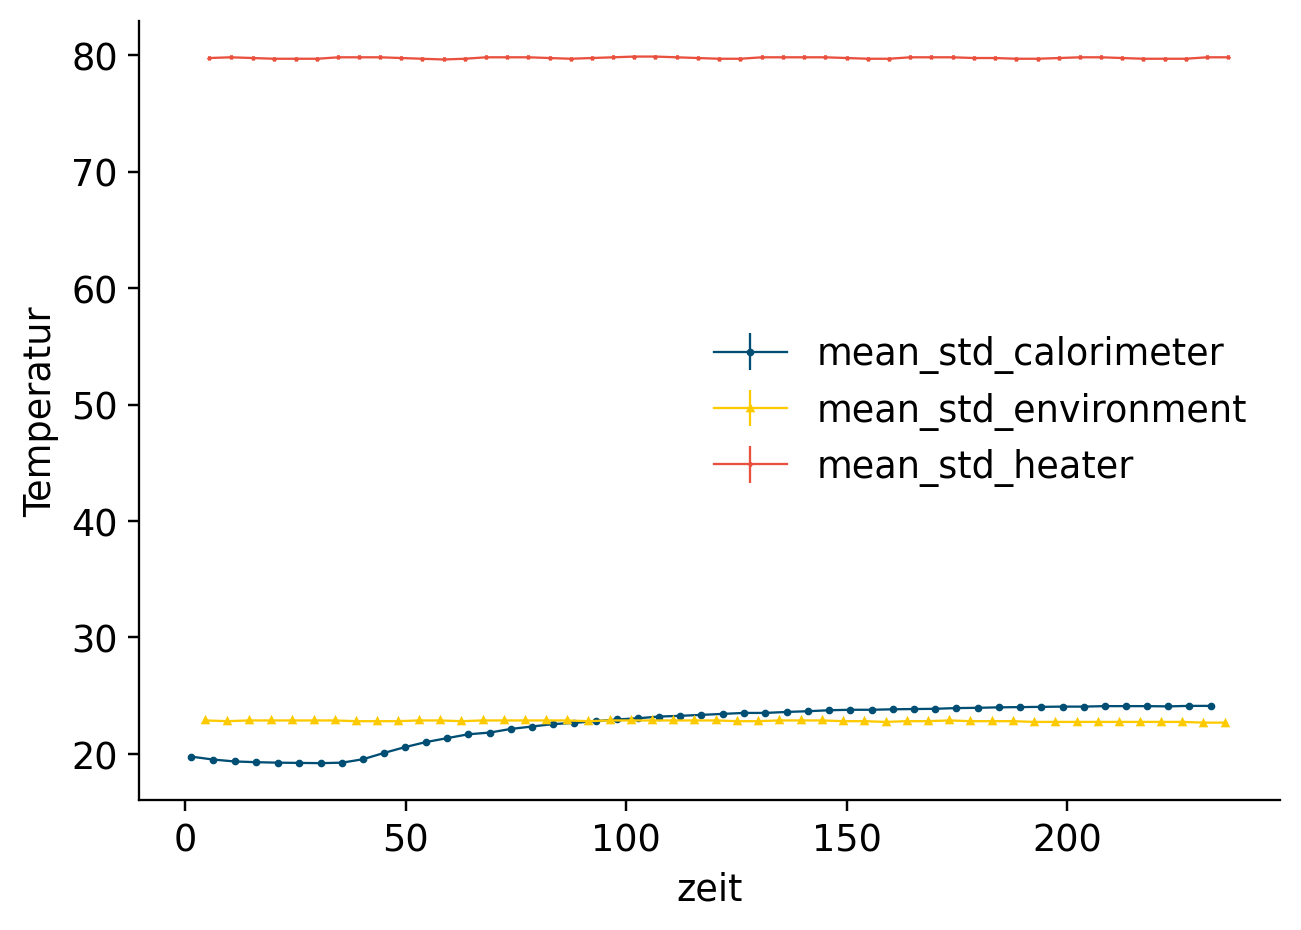

In [184]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data_mean,data_time,['mean_std_calorimeter','mean_std_environment','mean_std_heater'],'zeit','Temperatur')

# DONE #

#### (iv) Metadaten auslesen

In [185]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p3 = '/home/pi/calorimetry_laboratory/datasheets'

sample_mass = (m_json.get_json_entry(path_p3,"1ee7d44b-f497-6207-b38a-46bf9417809f",["probe","mass","value"]))

print(sample_mass)
# DONE #


93


#### (v) Anfangs- und Endwert der Temperatur

In [186]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 

print(temperature_mix, temperature_start_water)

# DONE #

24.004464285714285 19.15625


In [187]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
print(temperature_start_sample)

# DONE #

79.75625


#### (vi) spezifische Wärmekapazität bestimmen

In [188]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [189]:
sample_heat_capa

1.7807431331271255

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Wenn man die wärmekapazitäten der drei Proben vergleicht lässt sich feststellen,dass PA66 mit abstand die größte Wärmekapazitat besitzt. Dannach kommt Aluminium und zum schluss Messing mit der geringsten Wärmekapazität.Dadurch kann man feststellen das der Kunststoff eine größere Wärmekapazität als die Metalle besitzt.
Im folgenden Sind die offiziellen Wärmekapazitäten gegenüber der im Versuch bestimmten Wärmekapazitäten dargestellt. Dabei fällt auf das die Werte nicht all zu stark voneinander Abweichen, also noch im Rahmen der Messungenauigkeit liegen. Somit lässt sich sagen das der "einfache" Versuchsaufbau füt die Bestimmung von Wärmekapazitäten geeignet ist und die Abweichungen hauptsächlich durch Menschlichen eingriff entstanden sind. Bei dem Versuch könnte man Beispielsweise noch veruchen den Übergabg von Probe aus dem heißen H20 in das Kalte H2o zu verbessern, denn dort geht an der Luft einiges an wärme Verloren und außerdem wird auch heißes Wasser mit in das kalte Gefäß überführt, was die Messung zusätzlich verändern kann.
Alu: Realität:0,888 kj/kgK; Versuch: 0.9339888044277191 kj/kgK
Messing: Realität: 0,377 kj/kgK; Versuch: 0.39997179308908665 kj/kgK
PA66: Realität: 1,70 kj/kgK; Versuch: 1.7807431331271255 kj/kgK



## Fazit
Zurückblickend lässt sich sagen, dass mir der Versuch im Labor, seit anfang des Moduls, am meisten Spaß gemacht hat und am interessantesten war. Dies lag daran das man sich in einem Team den Ablauf und die Messwerte erarbeitet hat. Desweiteren hat man eine gut zu verstehende Messgröße mit einfachen mitteln bestimmen können. Dabei war es möglich vorab in seinem Team vermutungen aufzustellen und diese dann auf ihre Richtigkeit zu überprüfen.Die wichtigste Lektion die ich aber gelernt habe, war alles Stück für Stück zu bearbeiten und nichts zu überstürzen, da dann flüchtigkeitsfehler auftreten welche einen viel Zeit kosten können.